<a href="https://colab.research.google.com/github/WilsonBaezD/PythonCodes_Veju/blob/main/SolucionPenduloDobleAtadoAResorte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

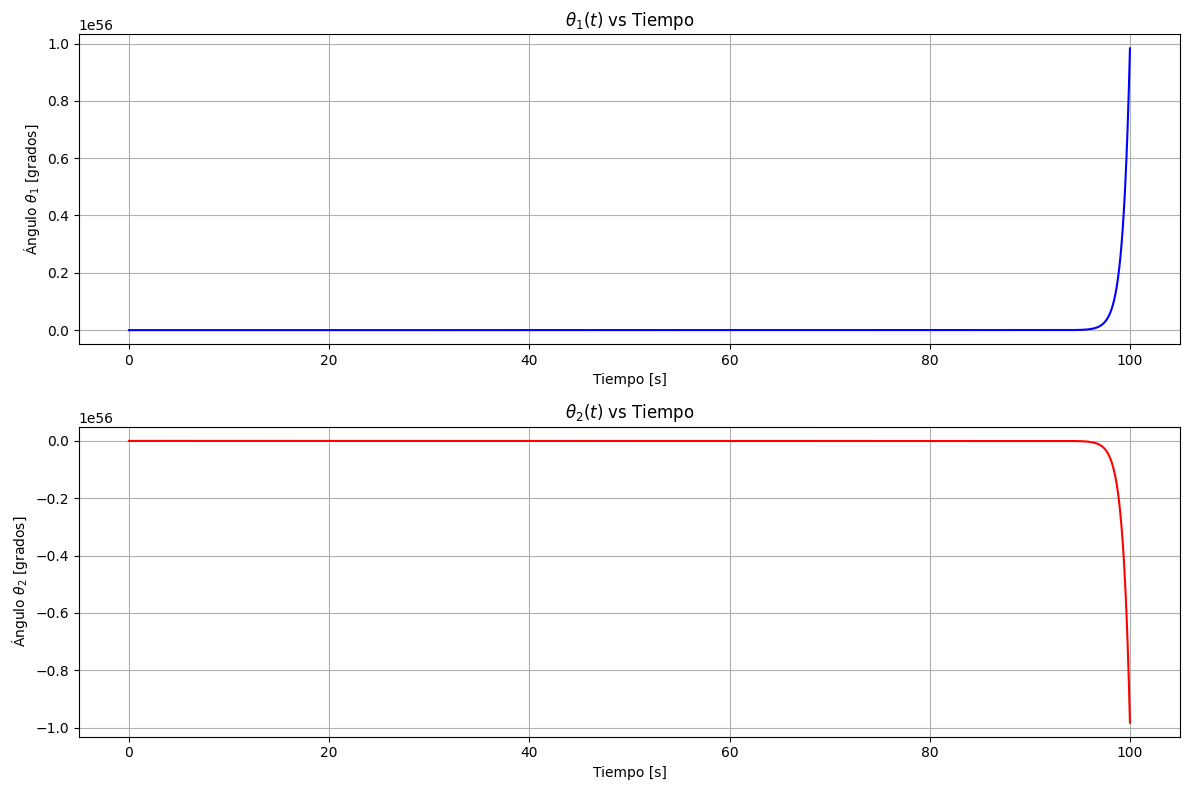

In [ ]:
#CODIGO PARA LA SOLUCION NUMERICA DEL SISTEMA DE ECUACIONES DIFERENCIALES


import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
m1 = 1.0  # masa 1 (kg)
m2 = 1.0  # masa 2 (kg)
l1 = 1.0  # longitud del péndulo 1 (m)
l2 = 1.0  # longitud del péndulo 2 (m)
g = 9.81  # aceleración debido a la gravedad (m/s^2)
k = 1.0   # constante de acoplamiento (N/m)
dix = 0.5  # distancia en x entre las dos masas (m)

# Condiciones iniciales (en grados)
theta1_0 = 10  # ángulo inicial de theta1 (grados)
theta2_0 = 15  # ángulo inicial de theta2 (grados)
omega1_0 = 0.0  # velocidad angular inicial de theta1 (rad/s)
omega2_0 = 0.0  # velocidad angular inicial de theta2 (rad/s)

# Convertir condiciones iniciales de grados a radianes
theta1_0_rad = np.deg2rad(theta1_0)
theta2_0_rad = np.deg2rad(theta2_0)

# Intervalo de tiempo
t0 = 0.0  # tiempo inicial
tf = 100.0  # tiempo final (ajustado para evitar acumulación de errores numéricos)
dt = 0.001  # paso de tiempo

# Número de pasos
n_steps = int((tf - t0) / dt) + 1

# Funciones del sistema de ecuaciones
def dtheta1_dt(omega1):
    return omega1

def dtheta2_dt(omega2):
    return omega2

def domega1_dt(theta1, theta2):
    term1 = -(g * np.sin(theta1)) / l1
    term2 = k * (dix * np.cos(theta1) + l2 * np.sin(theta1 - theta2)) / (m1 * l1)
    return term1 + term2

def domega2_dt(theta1, theta2):
    term1 = -(g * np.sin(theta2)) / l2
    term2 = -k * (dix * np.cos(theta2) + l1 * np.sin(theta1 - theta2)) / (m2 * l2)
    return term1 + term2

# Arrays para almacenar soluciones
t = np.linspace(t0, tf, n_steps)
theta1 = np.zeros(n_steps)
theta2 = np.zeros(n_steps)
omega1 = np.zeros(n_steps)
omega2 = np.zeros(n_steps)

# Condiciones iniciales
theta1[0] = theta1_0_rad
theta2[0] = theta2_0_rad
omega1[0] = omega1_0
omega2[0] = omega2_0

# Implementación del método de Runge-Kutta de cuarto orden
for i in range(1, n_steps):
    # Valores actuales
    theta1_i = theta1[i-1]
    theta2_i = theta2[i-1]
    omega1_i = omega1[i-1]
    omega2_i = omega2[i-1]

    # Cálculo de los coeficientes de Runge-Kutta
    k1_theta1 = dt * dtheta1_dt(omega1_i)
    k1_theta2 = dt * dtheta2_dt(omega2_i)
    k1_omega1 = dt * domega1_dt(theta1_i, theta2_i)
    k1_omega2 = dt * domega2_dt(theta1_i, theta2_i)

    k2_theta1 = dt * dtheta1_dt(omega1_i + 0.5 * k1_omega1)
    k2_theta2 = dt * dtheta2_dt(omega2_i + 0.5 * k1_omega2)
    k2_omega1 = dt * domega1_dt(theta1_i + 0.5 * k1_theta1, theta2_i + 0.5 * k1_theta2)
    k2_omega2 = dt * domega2_dt(theta1_i + 0.5 * k1_theta1, theta2_i + 0.5 * k1_theta2)

    k3_theta1 = dt * dtheta1_dt(omega1_i + 0.5 * k2_omega1)
    k3_theta2 = dt * dtheta2_dt(omega2_i + 0.5 * k2_omega2)
    k3_omega1 = dt * domega1_dt(theta1_i + 0.5 * k2_theta1, theta2_i + 0.5 * k2_theta2)
    k3_omega2 = dt * domega2_dt(theta1_i + 0.5 * k2_theta1, theta2_i + 0.5 * k2_theta2)

    k4_theta1 = dt * dtheta1_dt(omega1_i + k3_omega1)
    k4_theta2 = dt * dtheta2_dt(omega2_i + k3_omega2)
    k4_omega1 = dt * domega1_dt(theta1_i + k3_theta1, theta2_i + k3_theta2)
    k4_omega2 = dt * domega2_dt(theta1_i + k3_theta1, theta2_i + k3_theta2)

    # Actualizar valores de theta y omega
    theta1[i] = theta1_i + (k1_theta1 + 2*k2_theta1 + 2*k3_theta1 + k4_theta1) / 6
    omega1[i] = omega1_i + (k1_omega1 + 2*k2_omega1 + 2*k3_omega1 + k4_omega1) / 6
    theta2[i] = theta2_i + (k1_theta2 + 2*k2_theta2 + 2*k3_theta2 + k4_theta2) / 6
    omega2[i] = omega2_i + (k1_omega2 + 2*k2_omega2 + 2*k3_omega2 + k4_omega2) / 6

# Convertir los ángulos de radianes a grados para graficar
theta1 = np.rad2deg(theta1)
theta2 = np.rad2deg(theta2)

# Graficar los resultados en gráficos separados
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, theta1, label=r'$\theta_1(t)$', color='b')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'Ángulo $\theta_1$ [grados]')
plt.title(r'$\theta_1(t)$ vs Tiempo')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, theta2, label=r'$\theta_2(t)$', color='r')
plt.xlabel('Tiempo [s]')
plt.ylabel(r'Ángulo $\theta_2$ [grados]')
plt.title(r'$\theta_2(t)$ vs Tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()

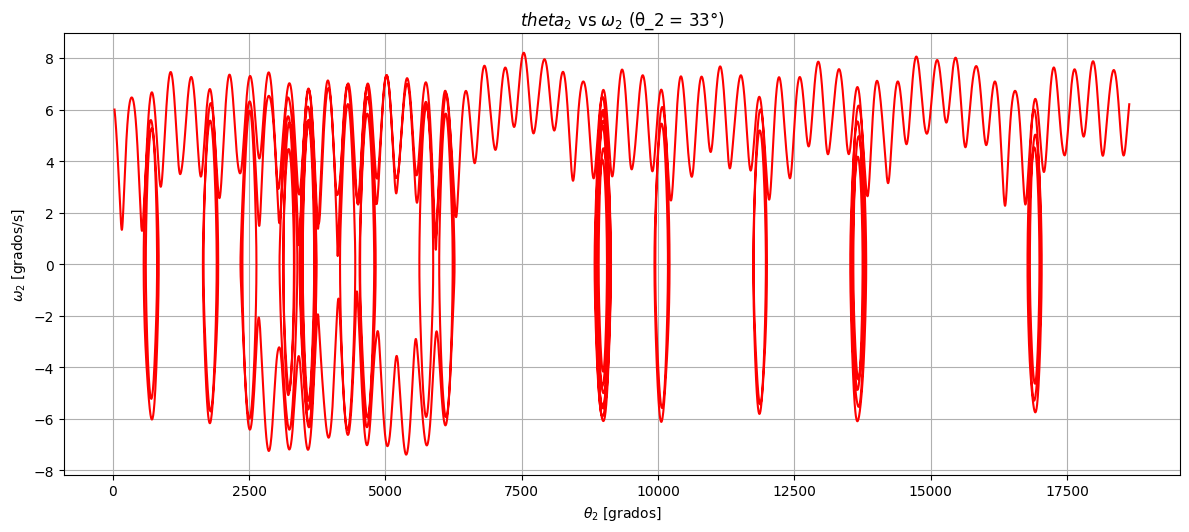

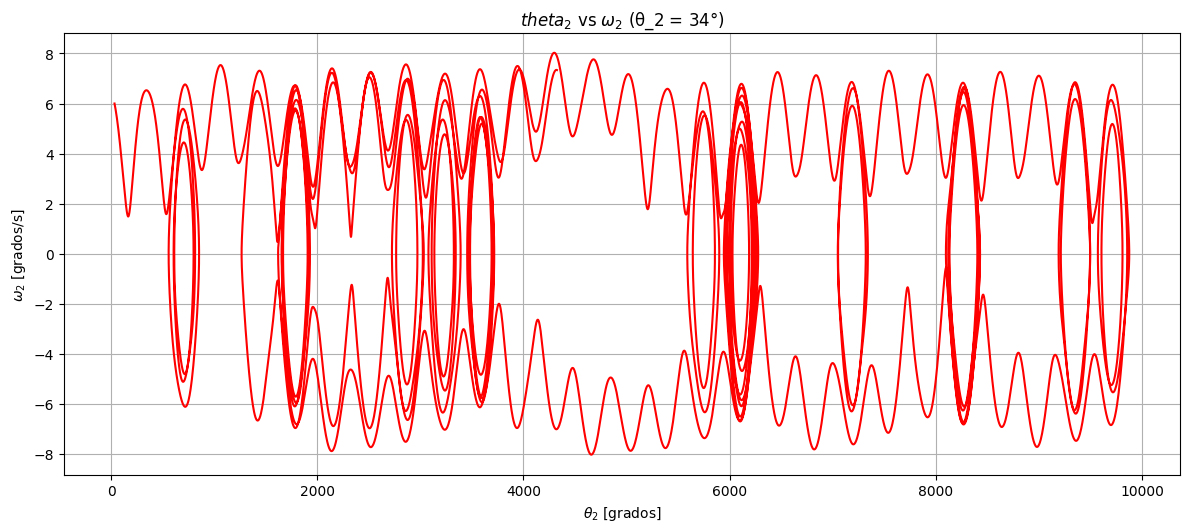

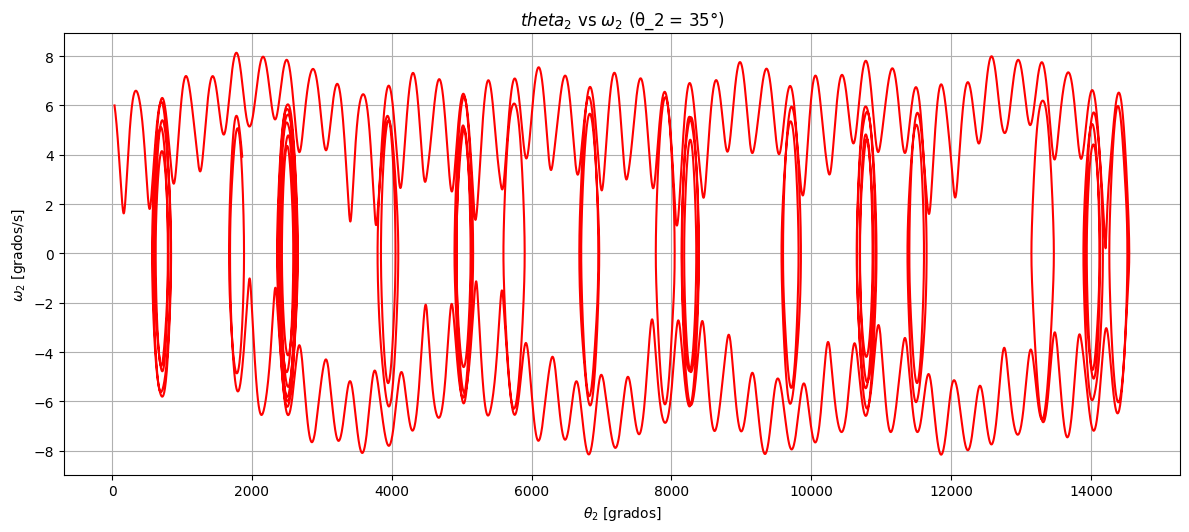

In [ ]:
#ESPACIO DE FASE PARA ANALIZAR EL COMPORTAMIENTO CAOTICO DE UN SISTEMA


import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
m1 = 1.0  # masa 1 (kg)
m2 = 1.0  # masa 2 (kg)
l1 = 1.0  # longitud del péndulo 1 (m)
l2 = 1.0  # longitud del péndulo 2 (m)
g = 9.81  # aceleración debido a la gravedad (m/s^2)
k = 2.0   # constante de acoplamiento (N/m)
dix = 1  # distancia en x entre las dos masas (m)

# Condiciones iniciales (en grados)
theta1_0 = 30  # ángulo inicial de theta1 (grados)
omega1_0 = 6  # velocidad angular inicial de theta1 (grados/s)
omega2_0 = 6 # velocidad angular inicial de theta2 (grados/s)

# Proporcionar manualmente los valores de theta2
theta2_values = [33, 34, 35]  # ángulos iniciales de theta2 (grados)

# Intervalo de tiempo
t0 = 0.0  # tiempo inicial
tf = 200.0  # tiempo final
dt = 0.01  # paso de tiempo

# Número de pasos
n_steps = int((tf - t0) / dt) + 1

# Funciones del sistema de ecuaciones
def dtheta1_dt(omega1):
    return omega1

def dtheta2_dt(omega2):
    return omega2

def domega1_dt(theta1, theta2):
    return -(g * np.sin(theta1)) / l1 + (k * (dix * np.cos(theta1) + l2 * np.sin(theta1 - theta2))) / (m1 * l1)

def domega2_dt(theta1, theta2):
    return -(g * np.sin(theta2)) / l2 - (k * (dix * np.cos(theta2) + l1 * np.sin(theta1 - theta2))) / (m2 * l2)

# Crear las gráficas para cada valor de theta2
for theta2_0 in theta2_values:
    # Convertir condiciones iniciales de grados a radianes
    theta1_0_rad = np.deg2rad(theta1_0)
    theta2_0_rad = np.deg2rad(theta2_0)

    # Arrays para almacenar soluciones
    t = np.linspace(t0, tf, n_steps)
    theta1 = np.zeros(n_steps)
    theta2 = np.zeros(n_steps)
    omega1 = np.zeros(n_steps)
    omega2 = np.zeros(n_steps)

    # Condiciones iniciales
    theta1[0] = theta1_0_rad
    theta2[0] = theta2_0_rad
    omega1[0] = omega1_0
    omega2[0] = omega2_0

    # Implementación del método de Runge-Kutta de cuarto orden
    for i in range(1, n_steps):
        # Valores actuales
        theta1_i = theta1[i-1]
        theta2_i = theta2[i-1]
        omega1_i = omega1[i-1]
        omega2_i = omega2[i-1]

        # Cálculo de los coeficientes de Runge-Kutta
        k1_theta1 = dt * dtheta1_dt(omega1_i)
        k1_theta2 = dt * dtheta2_dt(omega2_i)
        k1_omega1 = dt * domega1_dt(theta1_i, theta2_i)
        k1_omega2 = dt * domega2_dt(theta1_i, theta2_i)

        k2_theta1 = dt * dtheta1_dt(omega1_i + 0.5 * k1_omega1)
        k2_theta2 = dt * dtheta2_dt(omega2_i + 0.5 * k1_omega2)
        k2_omega1 = dt * domega1_dt(theta1_i + 0.5 * k1_theta1, theta2_i + 0.5 * k1_theta2)
        k2_omega2 = dt * domega2_dt(theta1_i + 0.5 * k1_theta1, theta2_i + 0.5 * k1_theta2)

        k3_theta1 = dt * dtheta1_dt(omega1_i + 0.5 * k2_omega1)
        k3_theta2 = dt * dtheta2_dt(omega2_i + 0.5 * k2_omega2)
        k3_omega1 = dt * domega1_dt(theta1_i + 0.5 * k2_theta1, theta2_i + 0.5 * k2_theta2)
        k3_omega2 = dt * domega2_dt(theta1_i + 0.5 * k2_theta1, theta2_i + 0.5 * k2_theta2)

        k4_theta1 = dt * dtheta1_dt(omega1_i + k3_omega1)
        k4_theta2 = dt * dtheta2_dt(omega2_i + k3_omega2)
        k4_omega1 = dt * domega1_dt(theta1_i + k3_theta1, theta2_i + k3_theta2)
        k4_omega2 = dt * domega2_dt(theta1_i + k3_theta1, theta2_i + k3_theta2)

        # Actualizar valores de theta y omega
        theta1[i] = theta1_i + (k1_theta1 + 2*k2_theta1 + 2*k3_theta1 + k4_theta1) / 6
        theta2[i] = theta2_i + (k1_theta2 + 2*k2_theta2 + 2*k3_theta2 + k4_theta2) / 6
        omega1[i] = omega1_i + (k1_omega1 + 2*k2_omega1 + 2*k3_omega1 + k4_omega1) / 6
        omega2[i] = omega2_i + (k1_omega2 + 2*k2_omega2 + 2*k3_omega2 + k4_omega2) / 6

    # Convertir los ángulos de radianes a grados para graficar
    theta1_deg = np.rad2deg(theta1)
    theta2_deg = np.rad2deg(theta2)

    # Graficar los resultados en gráficos separados para theta1 vs omega1 y theta2 vs omega2
    plt.figure(figsize=(12, 10))


    plt.subplot(2, 1, 2)
    plt.plot(theta2_deg, omega2, label=r'$\theta_2$ vs $\omega_2$', color='r')
    plt.xlabel(r'$\theta_2$ [grados]')
    plt.ylabel(r'$\omega_2$ [grados/s]')
    plt.title(f'$\ttheta_2$ vs $\omega_2$ (θ_2 = {theta2_0}°)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()


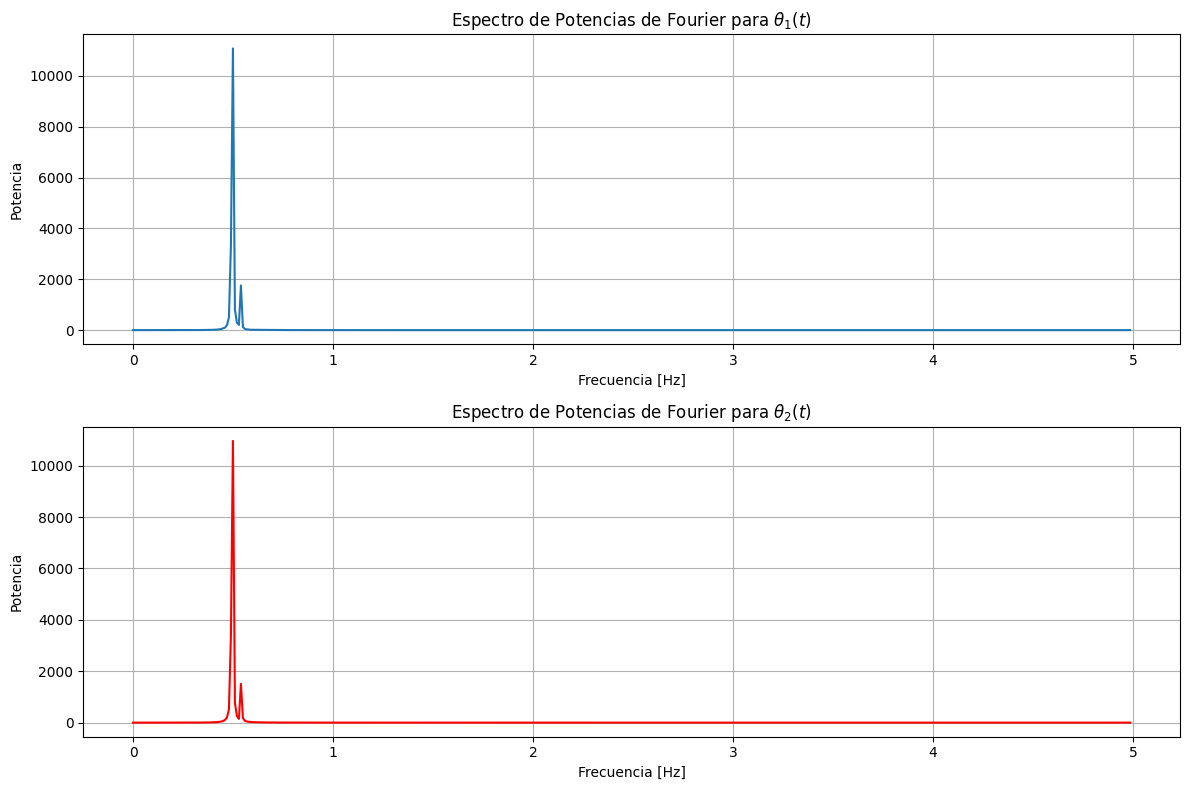

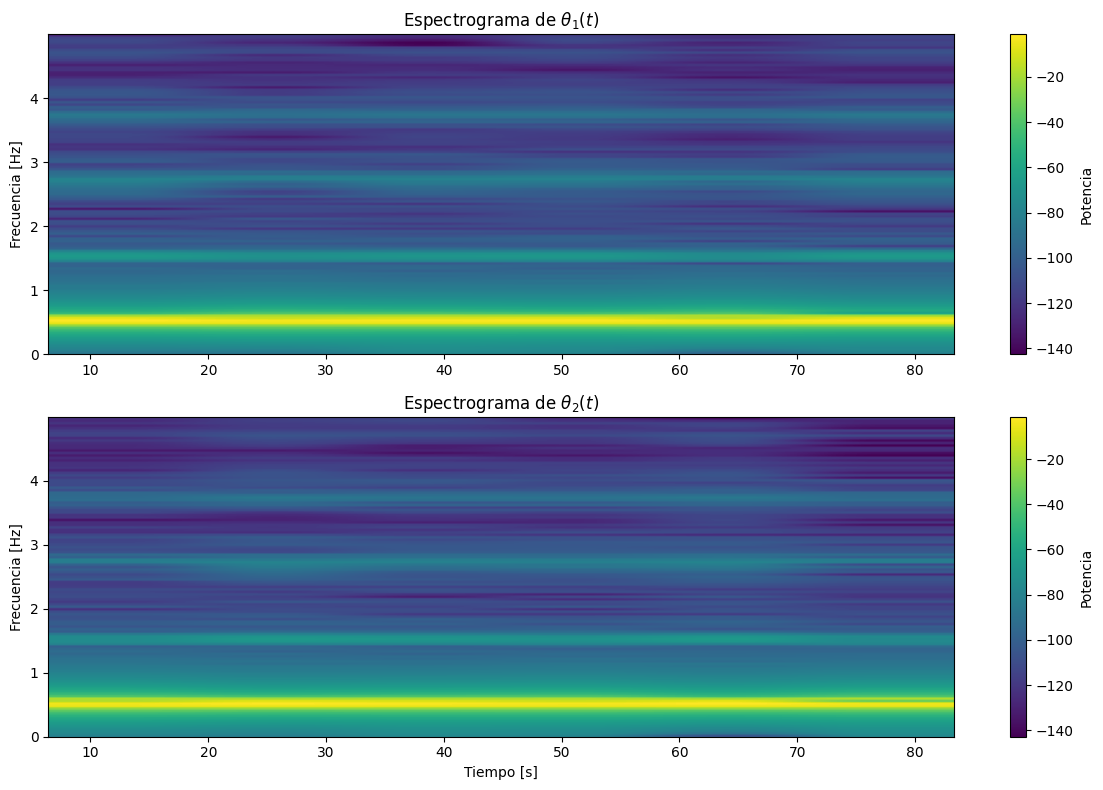

In [ ]:
#ESPECTRO DE POTENCIAS Y ESPECTROGRAMA

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import signal

# Parámetros físicos del sistema
g = 9.81  # m/s^2
l1 = 1.0  # longitud del péndulo 1
l2 = 1.0  # longitud del péndulo 2
m1 = 1.0  # masa del péndulo 1
m2 = 1.0  # masa del péndulo 2
k = 1.0   # constante del resorte

# Condiciones iniciales en grados: [theta1, theta1_dot, theta2, theta2_dot]
theta1_inicial = 10  # grados
theta2_inicial = 20  # grados

# Conversión a radianes
theta1_inicial = np.radians(theta1_inicial)
theta2_inicial = np.radians(theta2_inicial)

cond_iniciales = [theta1_inicial, 0, theta2_inicial, 0]

# Definición de las ecuaciones diferenciales
def ecuaciones(t, y):
    theta1, omega1, theta2, omega2 = y

    # Ecuaciones diferenciales dadas
    dtheta1_dt = omega1
    dtheta2_dt = omega2

    domega1_dt = -(g * np.sin(theta1)) / l1 + (k * (dix * np.cos(theta1) + l2 * np.sin(theta1 - theta2))) / (m1 * l1)
    domega2_dt = -(g * np.sin(theta2)) / l2 - (k * (dix * np.cos(theta2) + l1 * np.sin(theta1 - theta2))) / (m2 * l2)

    return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]

# Intervalo de tiempo para la simulación
t_span = (0, 100)
t_eval = np.linspace(0, 100, 1000)

# Resolución del sistema de ecuaciones diferenciales
sol = solve_ivp(ecuaciones, t_span, cond_iniciales, t_eval=t_eval, method='RK45')

# Obtención de las soluciones theta1 y theta2 en función del tiempo
theta1 = sol.y[0]
theta2 = sol.y[2]
t = sol.t

# --- Transformada Rápida de Fourier (FFT) ---

# Calcula la FFT
theta1_fft = np.fft.fft(theta1)
theta2_fft = np.fft.fft(theta2)

# Calcula las frecuencias correspondientes
freqs = np.fft.fftfreq(len(t), t[1] - t[0])

# Calcula el espectro de potencias (magnitud al cuadrado)
theta1_fft_power = np.abs(theta1_fft) ** 2
theta2_fft_power = np.abs(theta2_fft) ** 2

# Grafica el espectro de potencias para theta1
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(freqs[:len(freqs) // 2], theta1_fft_power[:len(freqs) // 2])
plt.title('Espectro de Potencias de Fourier para $\\theta_1(t)$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.grid(True)

# Grafica el espectro de potencias para theta2
plt.subplot(2, 1, 2)
plt.plot(freqs[:len(freqs) // 2], theta2_fft_power[:len(freqs) // 2], color='r')
plt.title('Espectro de Potencias de Fourier para $\\theta_2(t)$')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Espectrograma ---

# Frecuencia de muestreo
fs = 1 / (t[1] - t[0])

plt.figure(figsize=(12, 8))

# Genera el espectrograma para theta1
plt.subplot(2, 1, 1)
plt.specgram(theta1, NFFT=256, Fs=fs, noverlap=128, cmap='viridis')
plt.title('Espectrograma de $\\theta_1(t)$')
plt.ylabel('Frecuencia [Hz]')
plt.colorbar(label='Potencia')

# Genera el espectrograma para theta2
plt.subplot(2, 1, 2)
plt.specgram(theta2, NFFT=256, Fs=fs, noverlap=128, cmap='viridis')
plt.title('Espectrograma de $\\theta_2(t)$')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.colorbar(label='Potencia')

plt.tight_layout()
plt.show()
